In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np

# Change a few settings to my liking
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)

In [2]:
crime = pd.read_csv(r'C:\Users\bigba\codingClass\crimedata2.csv',encoding = "ISO-8859-1")

In [3]:
# Change ? to nulls, so that they can be more accurately counted
crime.replace('?', np.nan, inplace=True)

# Check the dataset for nulls
null_counts = crime.isnull().sum().sort_values(ascending=False)
null_counts.head(50)

PctPolicBlack           1872
PolicAveOTWorked        1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
NumKindsDrugsSeiz       1872
PolicBudgPerPop         1872
OfficAssgnDrugUnits     1872
PctPolicMinor           1872
PctPolicAsian           1872
PctPolicHisp            1872
PctPolicWhite           1872
RacialMatchCommPol      1872
PolicPerPop             1872
PolicReqPerOffic        1872
LemasTotReqPerPop       1872
LemasTotalReq           1872
LemasSwFTFieldPerPop    1872
LemasSwFTFieldOps       1872
LemasSwFTPerPop         1872
LemasSwornFT            1872
PolicCars               1872
communityCode           1224
countyCode              1221
ViolentCrimesPerPop      221
rapesPerPop              208
rapes                    208
nonViolPerPop             97
arsonsPerPop              91
arsons                    91
assaults                  13
assaultPerPop             13
autoTheftPerPop            3
autoTheft                  3
larcenies     

In [4]:
# Make crime2, which is crime but without any columns that had more than 100 nulls
crime2 = crime.loc[:, crime.isnull().sum() <= 100]

In [5]:
# Check the new null counts
null_counts2 = crime2.isnull().sum().sort_values(ascending=False)
null_counts2.head()

nonViolPerPop    97
arsonsPerPop     91
arsons           91
assaultPerPop    13
assaults         13
dtype: int64

In [6]:
# Drop any rows with null values
crime3 = crime2.dropna()
crime3.isnull().sum().sort_values(ascending=False).head()

Êcommunityname    0
state             0
RentHighQ         0
RentMedian        0
RentLowQ          0
dtype: int64

In [7]:
# Create a new dataframe which does not include irrelevant columns, but that does include how often people are relocating
places = crime3.drop(columns = ['state', 'Êcommunityname', 'fold', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
                              'PctImmigRec10', 'PctRecentImmig', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 
                             'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctForeignBorn', 'PctBornSameState', 'LandArea',
                             'PctUsePubTrans', 'LemasPctOfficDrugUn', 'murders', 'murdPerPop', 'robberies', 'robbbPerPop',
                             'assaults', 'assaultPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheft', 'autoTheftPerPop',
                             'arsons', 'arsonsPerPop', 'nonViolPerPop', 'population', 'racepctblack', 'racePctWhite',
                             'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
                             'numbUrban', 'pctUrban', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
                             'HispPerCap', 'pctWSocSec', 'pctWFarmSelf', 'pctWRetire', 'MalePctDivorce', 'MalePctNevMarr',
                             'FemalePctDiv', 'TotalPctDiv', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'NumImmig',
                            'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
                             'PctWorkMom', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
                             'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
                             'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctLargHouseFam', 'PctLargHouseOccup',
                             'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart' ,'OwnOccQrange',
                             'RentLowQ', 'RentMedian', 'RentHighQ', 'RentQrange', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                             'MedOwnCostPctIncNoMtg', 'PopDens', 'NumKidsBornNeverMar',
                             'PctKidsBornNeverMar', 'NumStreet', 'PctOccupManu', 'PctOccupMgmtProf'])

In [8]:
# Create a new dataframe which does not include how often people are relocating. We will use the previous dataframe later,
# however, first we'll be using this one
trim = places.drop(columns = ['PctSameHouse85', 'PctSameCity85', 'PctSameState85'])

In [9]:
# Check out the streamlined dataframe
trim.head(1).T

,0
householdsize,3.1
medIncome,75122
pctWWage,89.24
pctWInvInc,70.2
pctWPubAsst,1.03
medFamInc,79584
perCapInc,29711
NumUnderPov,227
PctPopUnderPov,1.96
PctLess9thGrade,5.81


In [10]:
# Check out the new shape
trim.shape

(2107, 19)

In [11]:
# Rename all of the columns so they make more sense
trim.columns = [
    'HouseholdSize', 'AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
    'MedIncome', 'PerCap', 'NumInPov', 'PerInPov', 'PerLess9thGrade', 
    'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmployed', 'PctManuel', 
    'PctMgmt', 'NumInShelter', 'Burglaries', 'BurgPerPop'
]

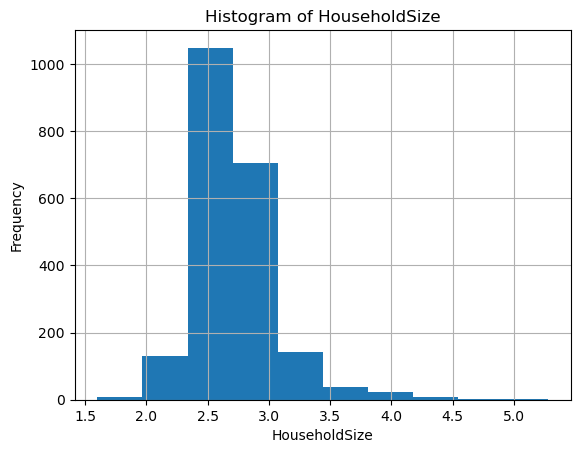

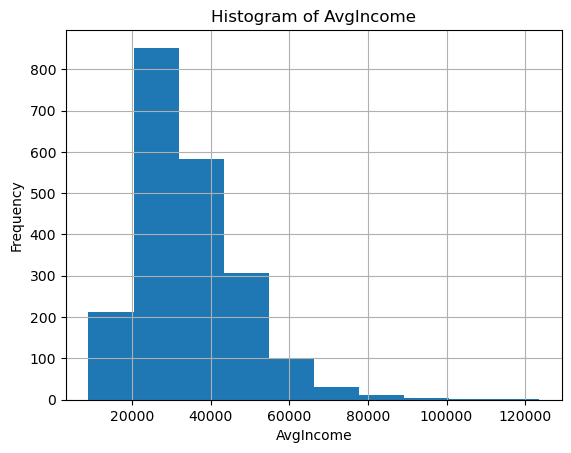

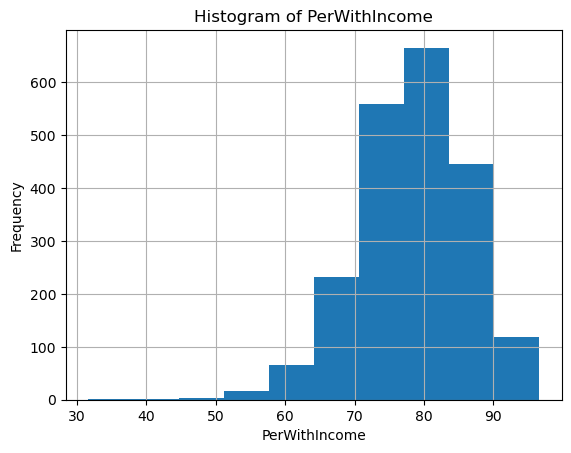

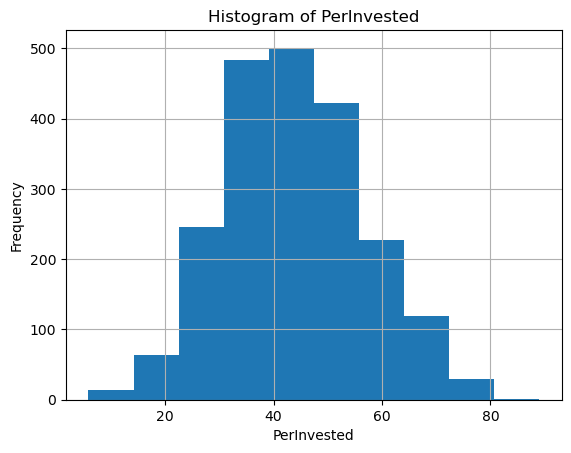

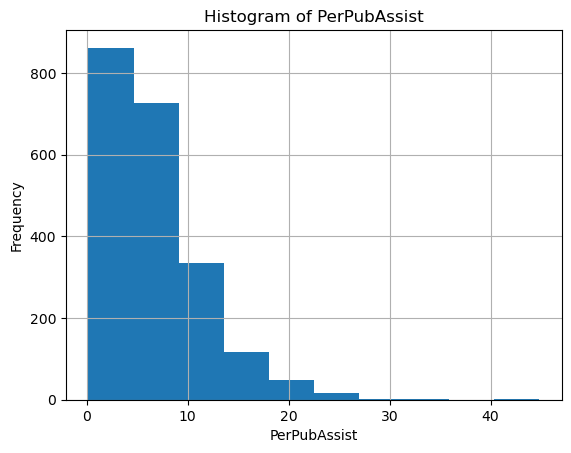

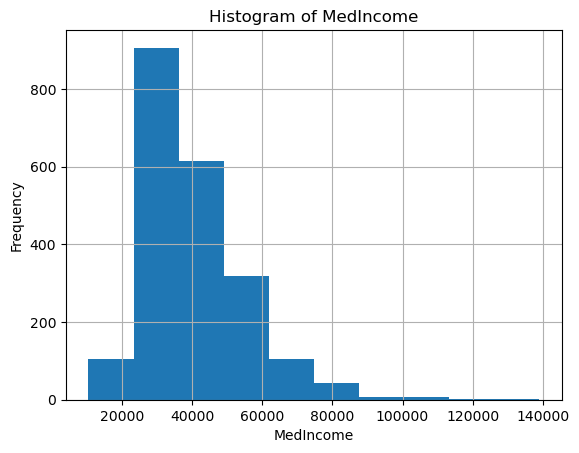

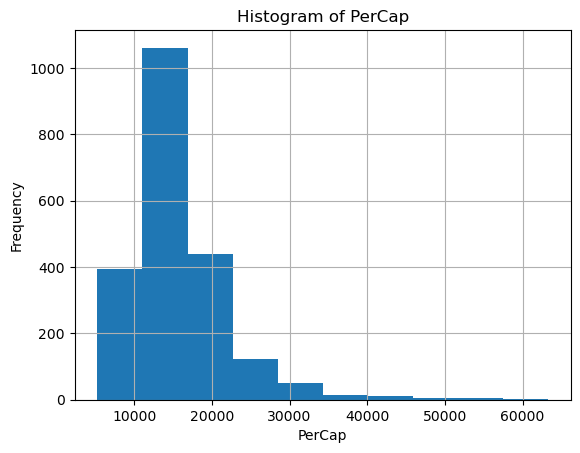

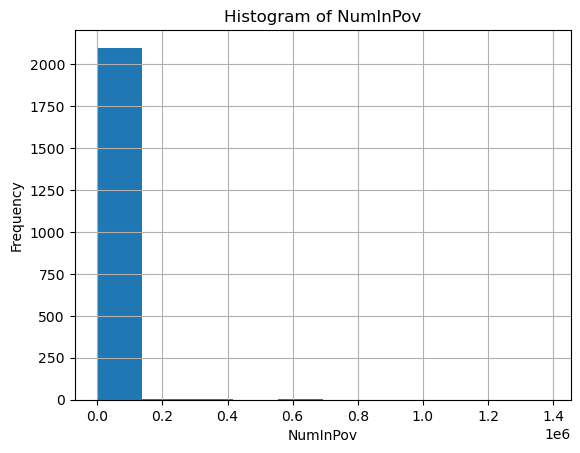

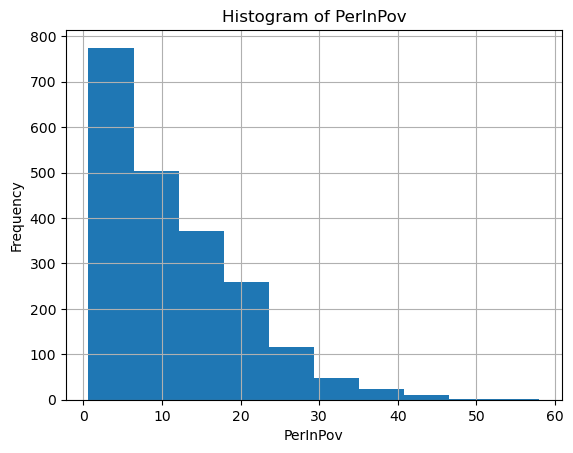

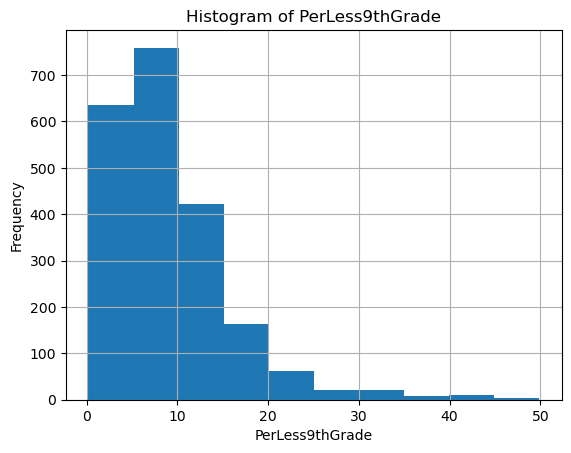

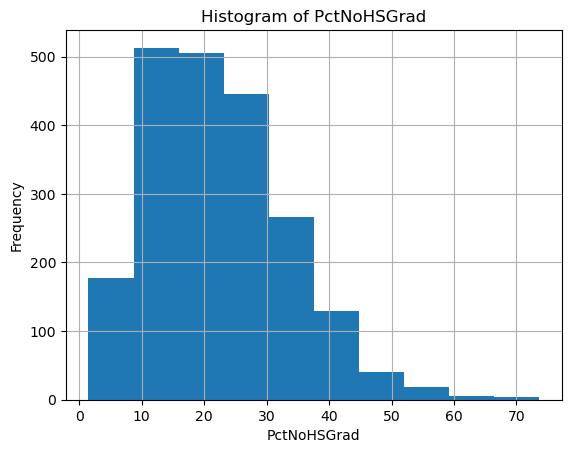

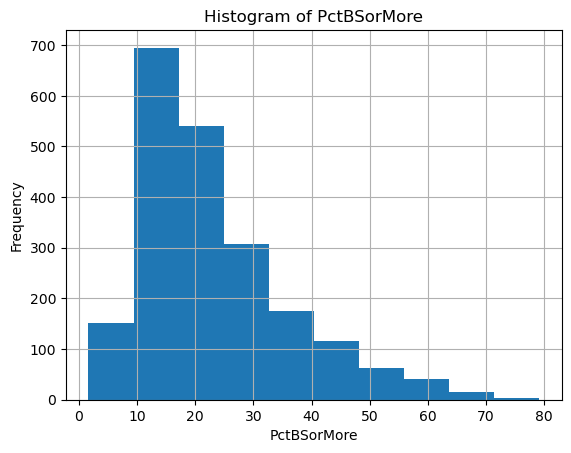

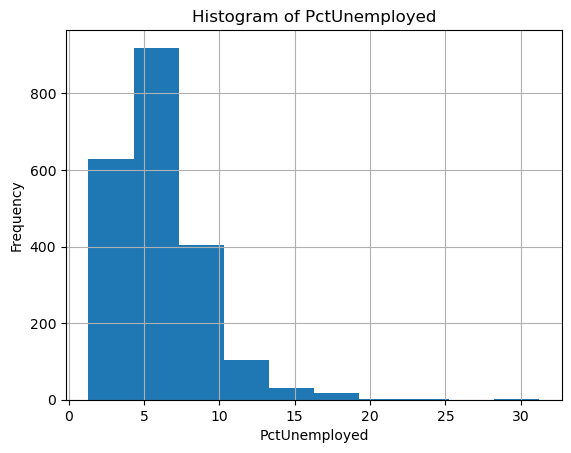

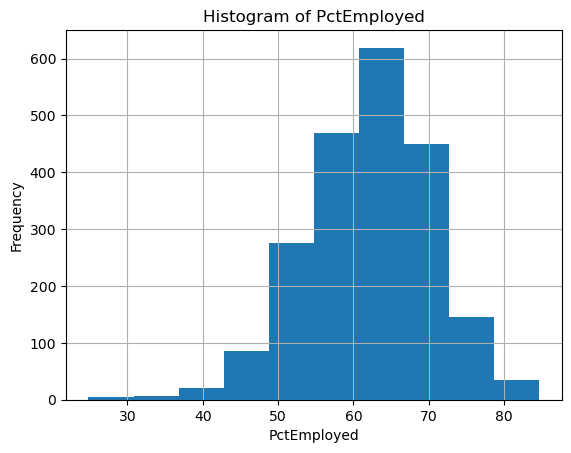

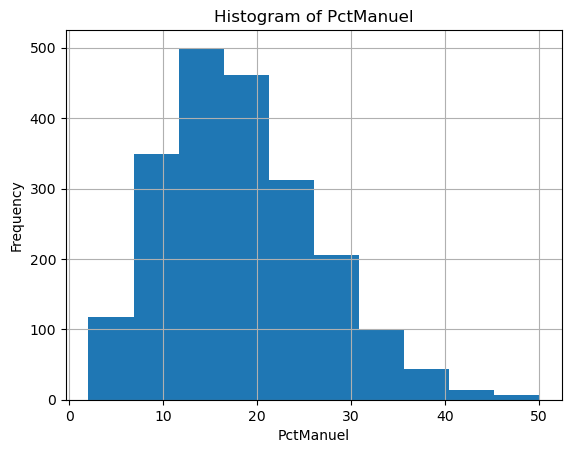

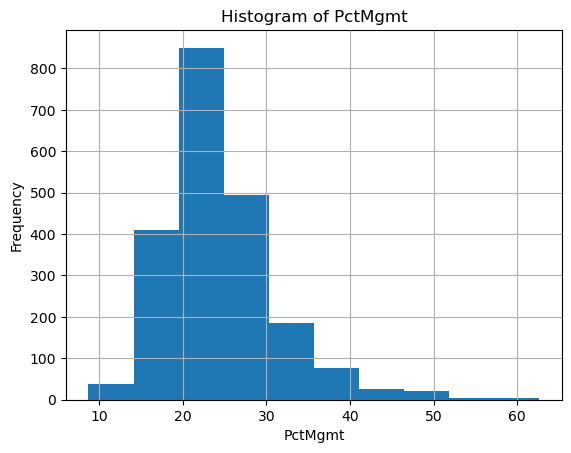

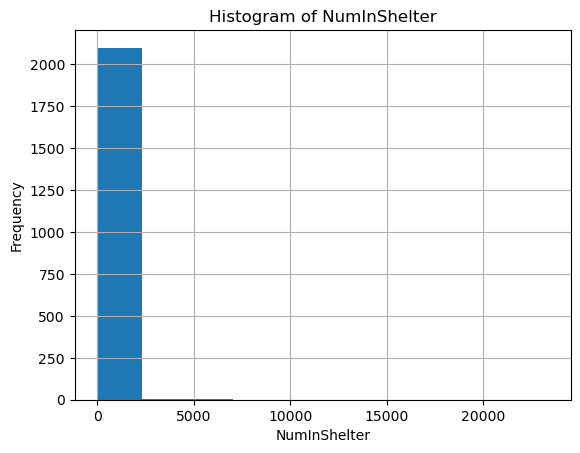

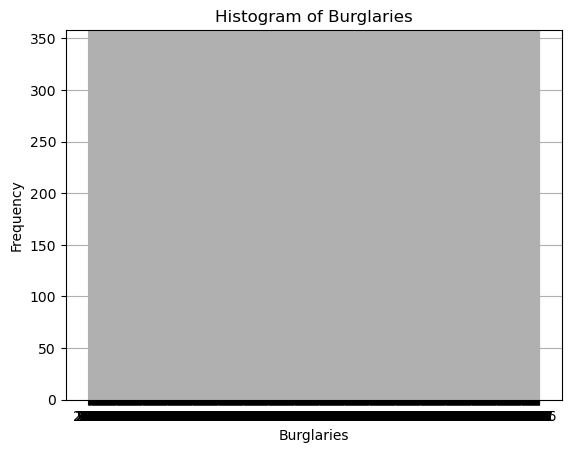

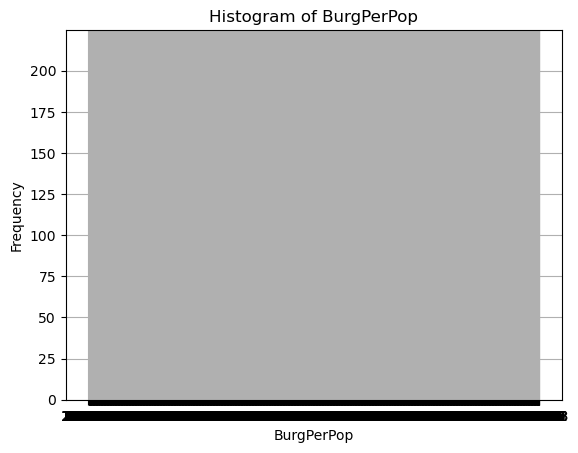

In [12]:
# Import neccessary libraries
import matplotlib.pyplot as plt

# Create a histogram for each variable, so it can be investigated
for column in trim.columns:
    plt.figure()
    trim[column].hist(bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
# Import neccessary libraries
from sklearn.model_selection import train_test_split

# Define the features and target variable using AvgIncome
avgFeatures = ['HouseholdSize', 'AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 
            'PctEmployed', 'PctManuel', 'PctMgmt', 'NumInShelter']
target = 'BurgPerPop'

# Split the data into training and testing sets
X = trim[avgFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
# Import neccessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [15]:
# Import neccessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate predictions using the Random Forest and Gradient Boosting models on the test data
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)

# Print the evaluation metrics
print("Random Forest Regression Metrics using Average Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print()
print("Gradient Boosting Regression Metrics using Average Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)

Random Forest Regression Metrics using Average Income:
MAE: 373.7922419354839
MSE: 293994.8428490483
RMSE: 542.212912838719

Gradient Boosting Regression Metrics using Average Income:
MAE: 366.2410799066308
MSE: 293651.1804562992
RMSE: 541.8959129355925


In [16]:
# Define the features and target using MedIncome
medFeatures = ['HouseholdSize', 'MedIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 
            'PctEmployed', 'PctManuel', 'PctMgmt', 'NumInShelter']
target = 'BurgPerPop'

# Split the data into training and testing sets
X = trim[medFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [18]:
# Generate predictions using the Random Forest and Gradient Boosting models on the test data
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)

# Print the evaluation metrics
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)

Random Forest Regression Metrics using Median Income:
MAE: 377.76194440227704
MSE: 323683.7950627807
RMSE: 568.9321533036964

Gradient Boosting Regression Metrics using Median Income:
MAE: 373.01326771743027
MSE: 304019.7989391368
RMSE: 551.379904366433


In [19]:
# Convert the 'BurgPerPop' column from object type to float for numerical operations
trim['BurgPerPop'] = trim['BurgPerPop'].astype(float)

# Calculate the 75th percentile (threshold) of 'BurgPerPop' to differentiate high and low burglary rates
threshold = trim['BurgPerPop'].quantile(0.75)

# Create a new column 'BurgClass' that classifies areas as 'High Burglaries' or 'Low Burglaries'
# based on whether 'BurgPerPop' is above or below the threshold
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['BurgPerPop']]

In [20]:
# Split the data into training and testing sets
X = trim[avgFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

                 precision    recall  f1-score   support

High Burglaries       0.46      0.77      0.58       133
 Low Burglaries       0.90      0.69      0.78       394

       accuracy                           0.71       527
      macro avg       0.68      0.73      0.68       527
   weighted avg       0.79      0.71      0.73       527



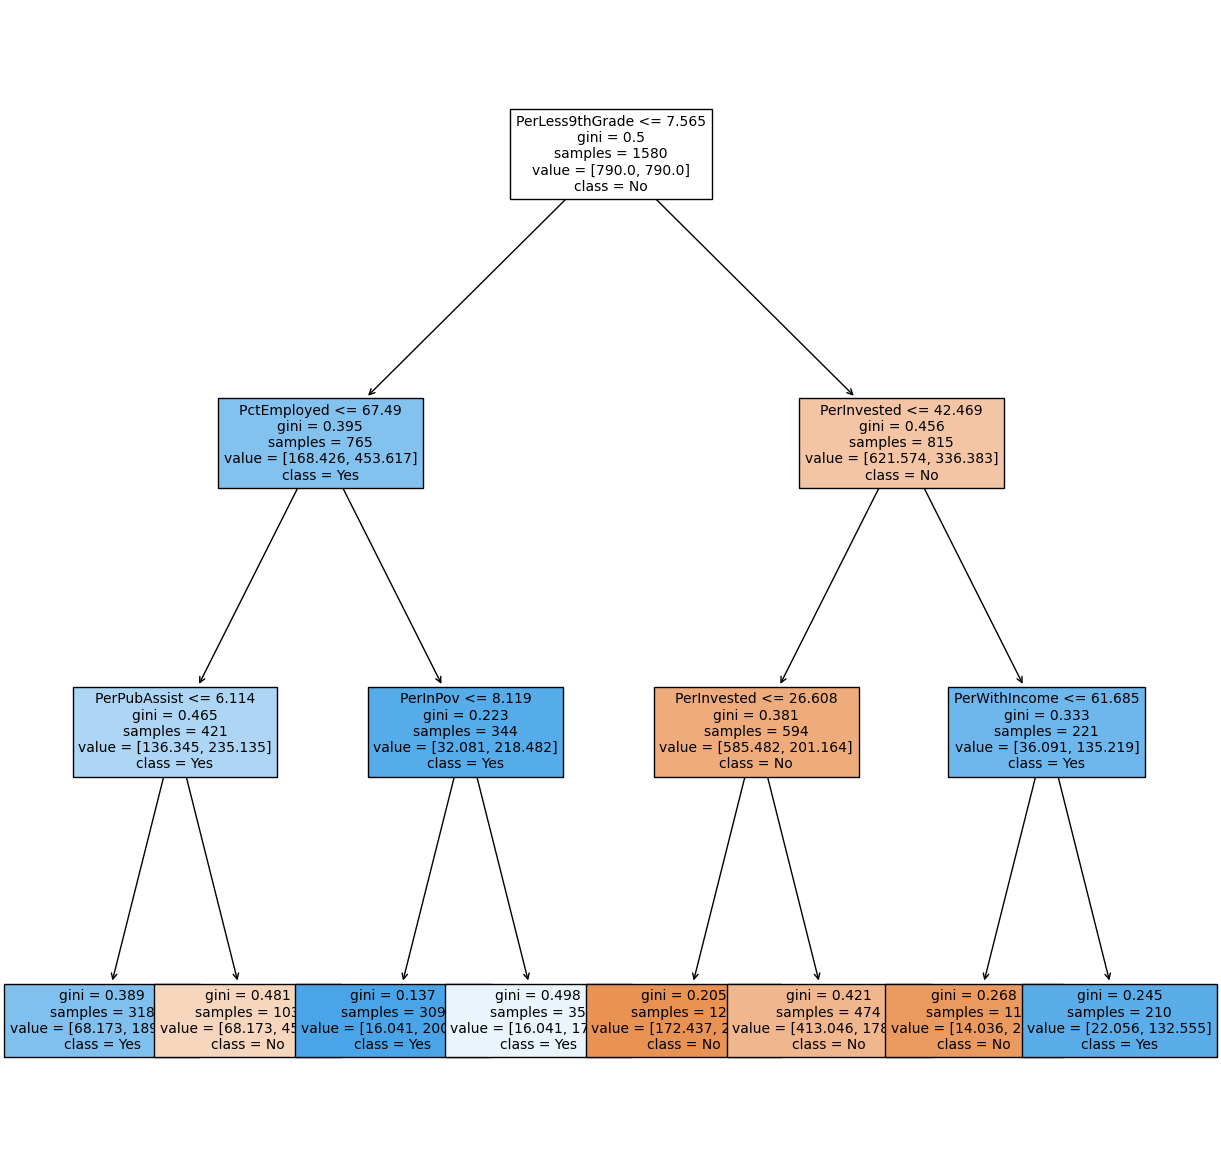

In [21]:
# Import necessary libraries for decision tree modeling and evaluation
from sklearn import tree
from sklearn import metrics

# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d, 
                                      class_weight=cw, 
                                      criterion=c, splitter=s, 
                                      min_samples_leaf=msl)
    
    # Train the classifier on the training data
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15,15))
    tree.plot_tree(clf2, 
                   feature_names=avgFeatures, 
                   class_names=['No','Yes'], 
                   filled=True, 
                   fontsize=10)

    # Predict and evaluate model performance on test data
    y_pred = clf2.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

# Run the model
run_model()

In [22]:
# Split the data into training and testing sets
X = trim[medFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

                 precision    recall  f1-score   support

High Burglaries       0.45      0.76      0.57       118
 Low Burglaries       0.91      0.73      0.81       409

       accuracy                           0.74       527
      macro avg       0.68      0.75      0.69       527
   weighted avg       0.81      0.74      0.76       527



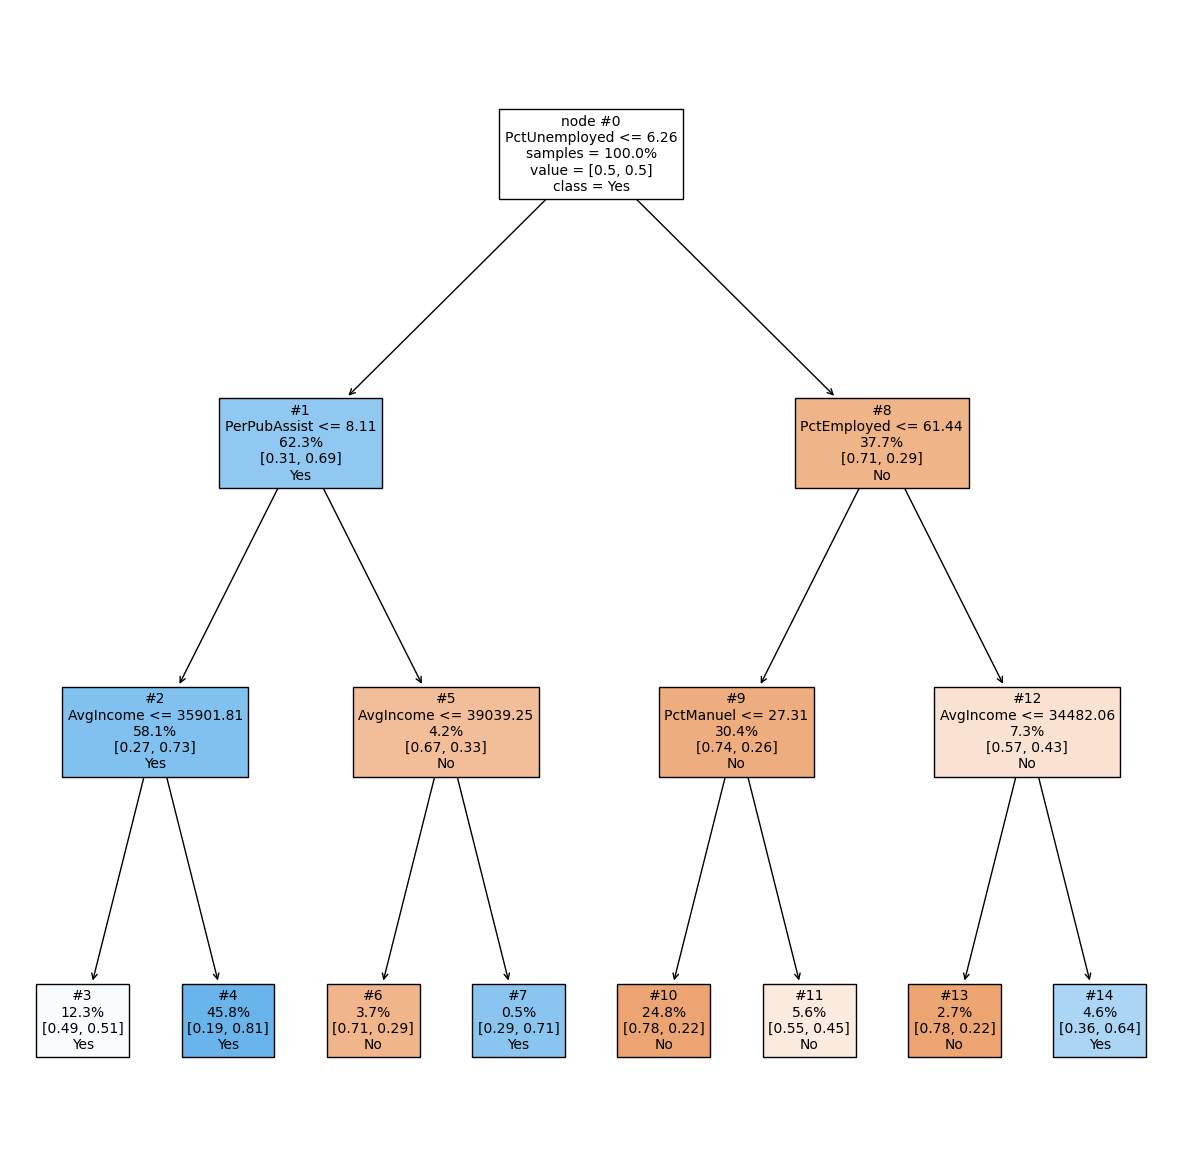

In [23]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d,
                                      class_weight=cw,
                                      criterion=c,
                                      splitter=s,
                                      min_samples_leaf=msl)
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15,15))
    tree.plot_tree(clf2,
               feature_names=avgFeatures,
               class_names=['No','Yes'],
               filled=True, precision=2,
               node_ids=True, fontsize=10,
               label='root', proportion=True,
               impurity=False)

    # Make predictions and print the classification report
    y_pred = clf2.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

# Run the model
run_model()

In [24]:
# Drop 'BurgClass'
trim = trim.drop(columns=['BurgClass'])

In [25]:
# Convert 'Burglaries' and 'BurgPerPop' to float type
trim[['Burglaries', 'BurgPerPop']] = trim[['Burglaries', 'BurgPerPop']].astype(float)
trim.dtypes

HouseholdSize      float64
AvgIncome            int64
PerWithIncome      float64
PerInvested        float64
PerPubAssist       float64
MedIncome            int64
PerCap               int64
NumInPov             int64
PerInPov           float64
PerLess9thGrade    float64
PctNoHSGrad        float64
PctBSorMore        float64
PctUnemployed      float64
PctEmployed        float64
PctManuel          float64
PctMgmt            float64
NumInShelter         int64
Burglaries         float64
BurgPerPop         float64
dtype: object

In [26]:
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.75)
        
        # Create a categorical variable based on quartiles
        df_categorized[column] = pd.cut(
            df[column],
            bins=[-float('inf'), q1, q2, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
    
    return df_categorized

# Apply categorize_numerical_columns to 'avgFeatures'
trim_categorized = categorize_numerical_columns(trim, avgFeatures)

In [27]:
# Ensure BurgPerPop is float type
trim['BurgPerPop'] = trim['BurgPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold
threshold = trim['BurgPerPop'].quantile(0.75)
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['BurgPerPop']]

# Add the 'BurgClass' column to the categorized DataFrame
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
# We want to use the categorized columns as features
avgFeatures = trim_categorized.columns.drop('BurgClass')  # Only keep the features, drop 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[avgFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Take a look at the data
trim_categorized.head()

,HouseholdSize,AvgIncome,PerWithIncome,PerInvested,PerPubAssist,PerInPov,PerLess9thGrade,PctNoHSGrad,PctBSorMore,PctUnemployed,PctEmployed,PctManuel,PctMgmt,NumInShelter,BurgClass
0,High,High,High,High,Low,Low,Medium,Low,High,Low,Medium,Medium,High,Medium,Low Burglaries
1,Medium,High,Medium,High,Low,Low,Medium,Low,High,Low,Medium,Medium,High,Low,Low Burglaries
2,Low,Medium,Medium,High,Low,Medium,Low,Low,High,Low,High,Medium,Medium,Medium,Low Burglaries
4,Medium,Low,Low,Medium,High,High,High,Medium,Medium,High,Low,Low,High,Medium,High Burglaries
5,Low,Low,Medium,Medium,Medium,High,Medium,Medium,Medium,Medium,Medium,Medium,Medium,High,Low Burglaries


In [29]:
# One-hot-encode 'trim_categorized'
trim_dummies = pd.get_dummies(trim_categorized)

In [30]:
# Create the categorized 'avgFeatures'
avgFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries','BurgClass_Low Burglaries'])

In [31]:
# Split the data into training and testing sets
X = avgFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [32]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [33]:
# Make predictions using both models on the test data
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Calculate error metrics for Random Forest and Gradient Boosting models
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)

# Print evaluation metrics for both models
print("Random Forest Regression Metrics using Average Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print()
print("Gradient Boosting Regression Metrics using Average Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)

Random Forest Regression Metrics using Average Income:
MAE: 0.3831326013799587
MSE: 0.2172243205916993
RMSE: 0.4660732995910614

Gradient Boosting Regression Metrics using Average Income:
MAE: 0.3610198961925261
MSE: 0.18053601511014578
RMSE: 0.4248952989974657


              precision    recall  f1-score   support

       False       0.80      0.54      0.64       412
        True       0.24      0.52      0.33       115

    accuracy                           0.54       527
   macro avg       0.52      0.53      0.49       527
weighted avg       0.68      0.54      0.58       527



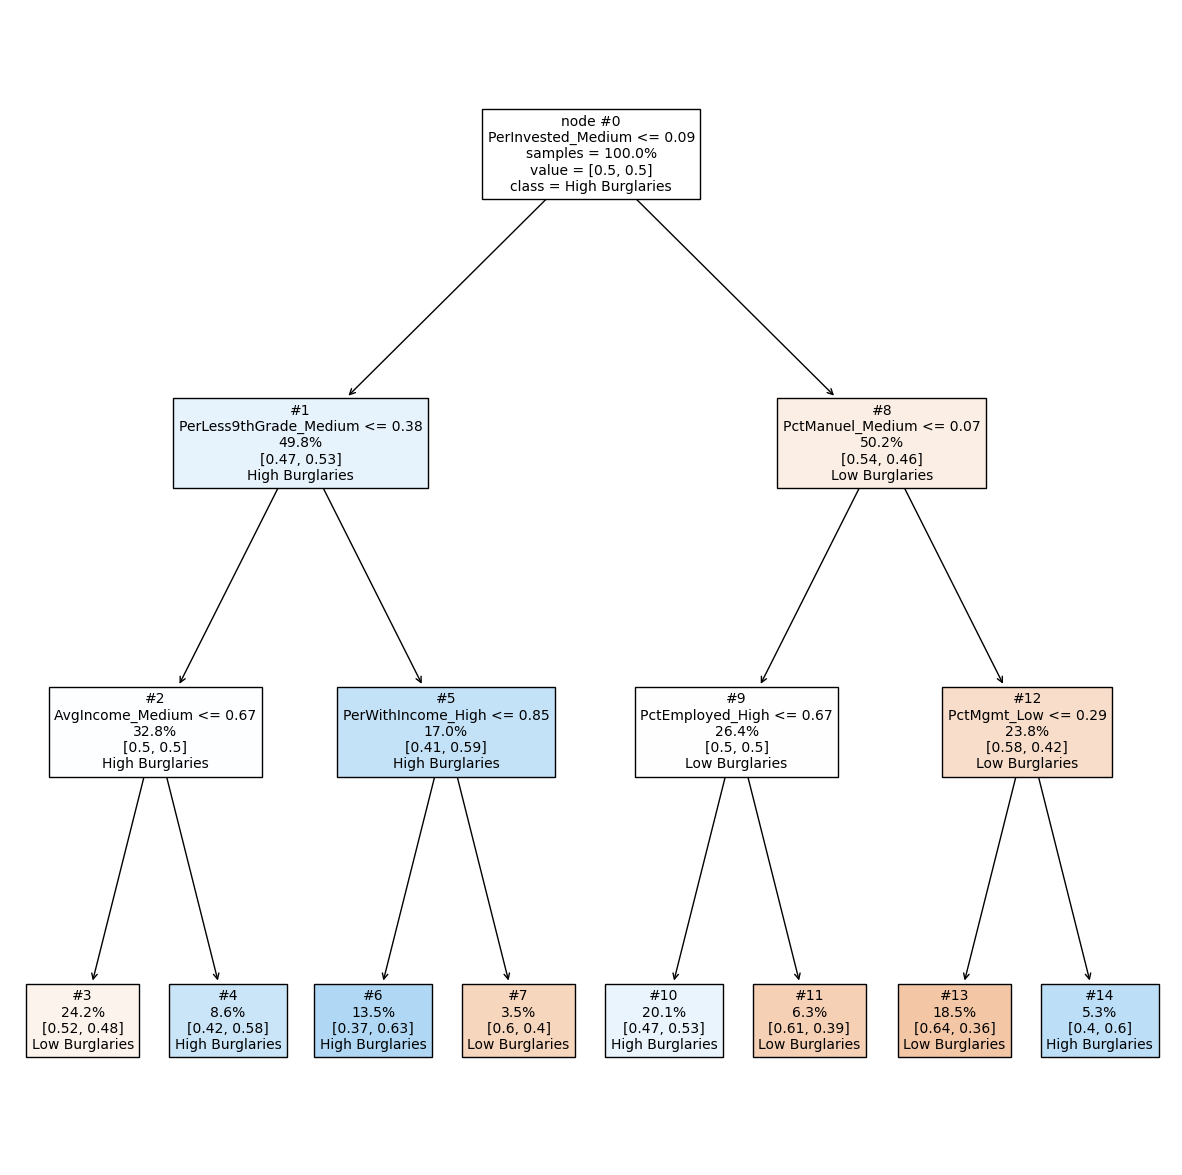

In [34]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Attempt to run the decision tree model with the provided parameters
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)
        clf2 = clf.fit(X_train, y_train)

        # Plot the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)

        # Make predictions and print the classification report
        y_pred = clf2.predict(X_test)
        print(metrics.classification_report(y_test, y_pred))

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")

# Run the model
run_model()

In [35]:
# Categorize numerical columns in the DataFrame
trim_categorized = categorize_numerical_columns(trim, medFeatures)

# Add the 'BurgClass' column back to the categorized DataFrame for classification
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
medFeatures = trim_categorized.columns.drop('BurgClass')  # Keep only feature columns, excluding 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[medFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
# Convert categorical variables in the DataFrame to one-hot encoded dummy variables
trim_dummies = pd.get_dummies(trim_categorized)

In [37]:
# Define the feature set by dropping specific target class columns from the one-hot encoded DataFrame
medFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries', 'BurgClass_Low Burglaries'])

In [38]:
# Split the data into training and testing sets
X = medFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
# Make predictions using the models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Calculate evaluation metrics for both models
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)

# Output evaluation metrics for comparison
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)

Random Forest Regression Metrics using Median Income:
MAE: 0.37553292964238
MSE: 0.21510950541923685
RMSE: 0.46379899247328776

Gradient Boosting Regression Metrics using Median Income:
MAE: 0.3675738616367056
MSE: 0.19282563901063565
RMSE: 0.43911916265478057


              precision    recall  f1-score   support

       False       0.77      0.67      0.71       396
        True       0.28      0.40      0.33       131

    accuracy                           0.60       527
   macro avg       0.53      0.53      0.52       527
weighted avg       0.65      0.60      0.62       527



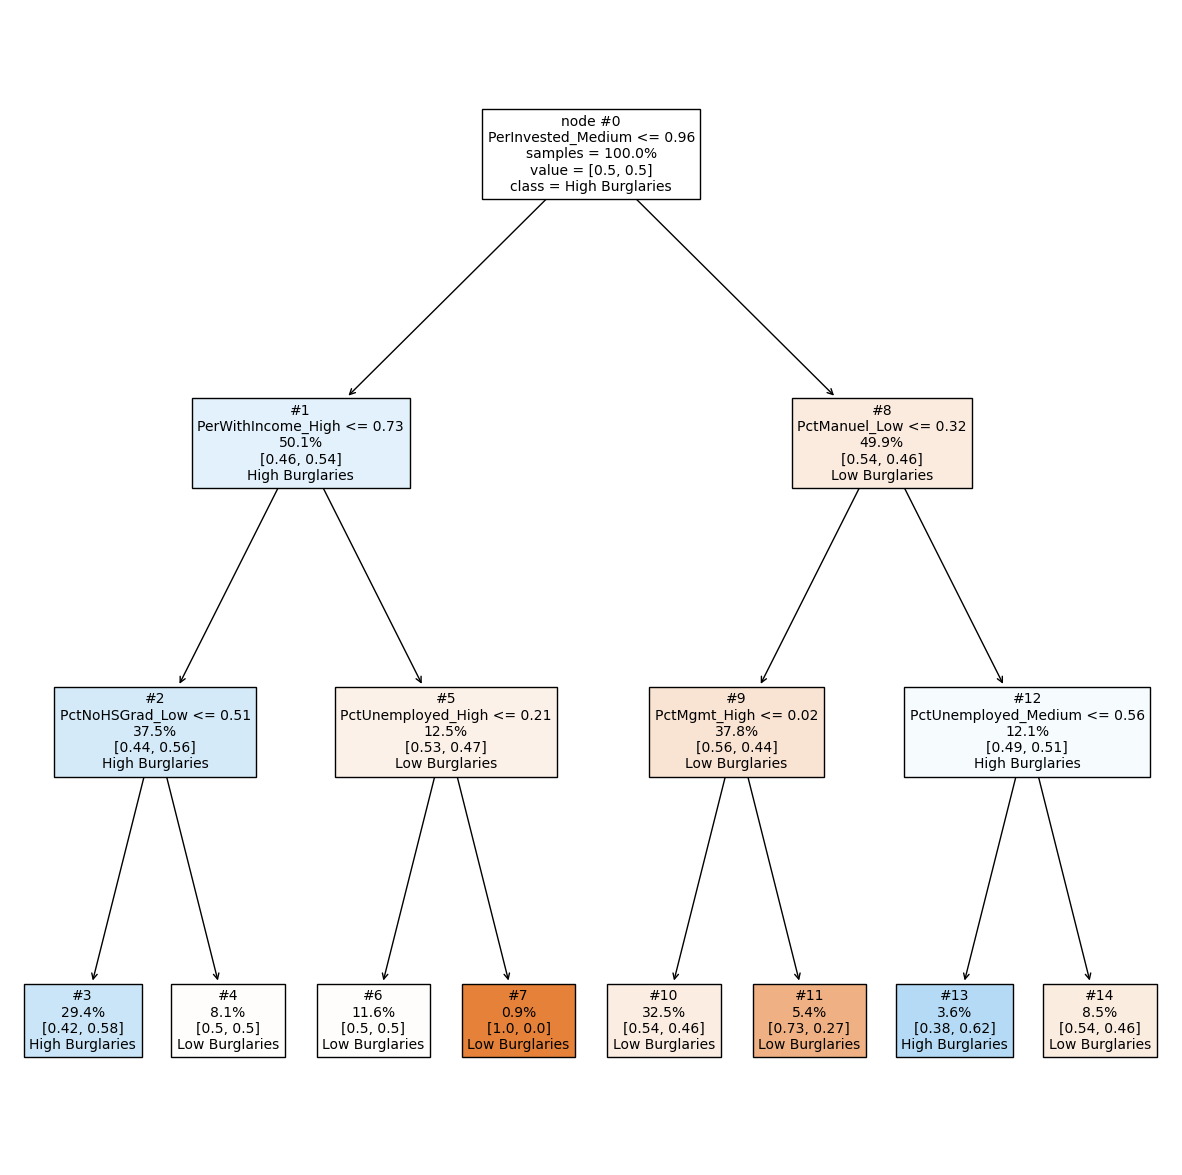

In [41]:
# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)

        clf2 = clf.fit(X_train, y_train)

        # Visualize the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)

        # Predict and evaluate model performance
        y_pred = clf2.predict(X_test)
        print(metrics.classification_report(y_test, y_pred))

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")

# Run the model
run_model()

In [42]:
# Set up for a correlation test, to see if an area's turnover is corrlated with its burglary rates
corrtest = places.drop(columns=['householdsize', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWPubAsst',
       'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'NumInShelters', 'burglaries'])

In [43]:
# Test correlation
corrtest.corr()

,PctSameHouse85,PctSameCity85,PctSameState85,burglPerPop
PctSameHouse85,1.000000,0.804595,0.656415,-0.204957
PctSameCity85,0.804595,1.000000,0.725802,0.010459
PctSameState85,0.656415,0.725802,1.000000,-0.060021
burglPerPop,-0.204957,0.010459,-0.060021,1.000000


## Places where people don't move have more burglaries

In [44]:
# Rename columns to be more easily understandable
places.columns = [
    'HouseholdSize', 'AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
    'MedIncome', 'PerCap', 'NumInPov', 'PerInPov', 'PerLess9thGrade', 
    'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmployed', 'PctManuel', 
    'PctMgmt', 'NumInShelter', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
    'Burglaries', 'BurgPerPop'
]

In [45]:
# Convert 'Burglaries' and 'BurgPerPop' into float type
places[['Burglaries', 'BurgPerPop']] = places[['Burglaries', 'BurgPerPop']].astype(float)

In [46]:
# Define the features and target variable for the first test, using MedIncome
medFeatures = ['HouseholdSize', 'MedIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 
            'PctEmployed', 'PctManuel', 'PctMgmt', 'NumInShelter', 'PctSameHouse85', 
            'PctSameCity85', 'PctSameState85']

In [47]:
# Categorize numerical columns based on quartiles
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.75)
        
        # Create a categorical variable based on quartiles
        df_categorized[column] = pd.cut(
            df[column],
            bins=[-float('inf'), q1, q2, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
    
    return df_categorized

# Apply categorization to the specified DataFrame
places_categorized = categorize_numerical_columns(places, medFeatures)

In [48]:
# Ensure BurgPerPop is float type for accurate calculations
places['BurgPerPop'] = places['BurgPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold for burglary classification
threshold = places['BurgPerPop'].quantile(0.75)
places['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in places['BurgPerPop']]

# Categorize numerical columns using the predefined function
places_categorized = categorize_numerical_columns(places, medFeatures)

# Add the 'BurgClass' column back to the categorized DataFrame for target classification
places_categorized['BurgClass'] = places['BurgClass'].reset_index(drop=True)

# Define features and target variable for the model training
medFeatures = places_categorized.columns.drop('BurgClass')  # Keep only features, exclude 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets for model evaluation
X = places_categorized[medFeatures]
y = places_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
# One-hot-encode
places_dummies = pd.get_dummies(places_categorized)

In [50]:
# Define 'medFeatures'
medFeatures = places_dummies.drop(columns=['BurgClass_High Burglaries','BurgClass_Low Burglaries'])

In [51]:
# Split the data into training and testing sets
X = medFeatures
y = places_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [52]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [53]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
rf_mae = mean_absolute_error(y_test, rf_predictions)  # Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)  # Gradient Boosting evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)

# Display the evaluation results for both models
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)

Random Forest Regression Metrics using Median Income:
MAE: 0.3733758348440512
MSE: 0.20279274193001912
RMSE: 0.4503251513406942

Gradient Boosting Regression Metrics using Median Income:
MAE: 0.3665781304953411
MSE: 0.1911544440283356
RMSE: 0.4372121270371347
